# Examples of the Frequentist Framework

As mentioned on Tuesday, the Frequentist perspective tends to focus on probabilities about the data, rather than the hypothesis or parameters.  The primary aim of many frequentist tests on data is to see if you can reject the null hypothesis:

$H_0$ - The null hypothesis suggests that no statistical relationship and significance exists in a set of given single observed variable, between two sets of observed data and measured phenomena.

There are many different ways to test hypotheses (we'll get to more of these later), but this notebook introduces two scenarios you can explore.

First, let's import a few packages that will help us:

In [101]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Now, we're going to use some random numbers that Python can generate for us.  However, to make things simple, we're going to force Python to generate the same random numbers for each person running this notebook.  To do this, we set the "seed" to be the same value across computers.

In [24]:
# seed the random number generator (this helps everyone stay consistent)
np.random.seed(1)

### Example 1

Imagine that you're working at the Environmental Modeling Center in College Park, MD.  Your job is to help improve the forecast models, and in particular the Global Forecasting System (GFS).  Your group has been developing the 16th version of the GFS model and has been running both Version 16 and Version 15 of the GFS to compare their accuracy at forecasting temperature.  

For this scenario, we're going to generate a random distribution of temperature errors from each "version".  We're making up some fake data here for simplicity using the Normal Distribution, which needs a mean (loc), spread (scale), and size.  Keep in mind that in reality, we don't know much about the underlying distribution of errors (e.g., mean, spread, etc.).  We can only sample them.

For the GFSv15, we're going imagine that it has a warm bias, and we'll make that bias to be 1 C.  In our updated model (GFSv16), we've made changes tht removed the bias.  Let's generate our fake data here.  Imagine that we have $N_{forecasts}=50$.

In [89]:
N_forecasts = 50

gfs15_bias = 1
gfs16_bias = 0

# create two independent sample groups
gfs15_sample = np.random.normal(loc=gfs15_bias, scale=4, size=N_forecasts)
gfs16_sample = np.random.normal(loc=gfs16_bias, scale=4, size=N_forecasts)

Before we do anything else, let's stop and take a look at the data we generated.  Let's make two plots - each is a histogram of the temperature errors from the two GFS versions.

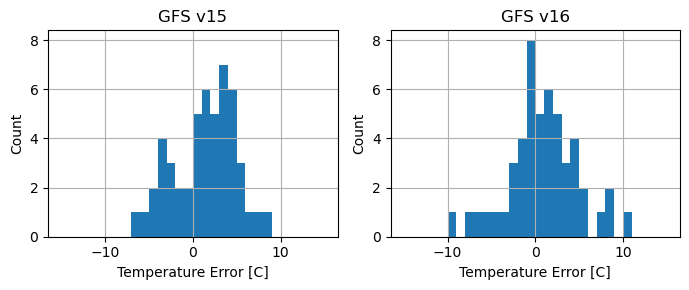

In [90]:
bins = np.arange(-15,16)

plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.title('GFS v15')
plt.hist(gfs15_sample, bins)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Temperature Error [C]")

plt.subplot(1,2,2,sharey=plt.gca())
plt.title('GFS v16')
plt.hist(gfs16_sample, bins)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Temperature Error [C]")
plt.tight_layout()

plt.show()

These two distributions look pretty similar!  How might we know whether or not we actually have an improvement in the GFS with v16?

Python makes a lot of statistical testing pretty easy.  Each test computes a test statistic and the P-value.  The SciPy package has a number of statistical tests we can apply to our data.  We're going to use a test called the *t-test* which is a very commonly used test to figure out if the two sample datasets we create are from the same population.  This test will return two variables.  The first is the T-statistic value, the second is the P-value.

In [97]:
t_stat, p_value = stats.ttest_ind(gfs15_sample, gfs16_sample, equal_var=False)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  0.6056222156913355
P-Value:  0.5461860642191445


Now that we have our P-value, we can figure out whether or not we need to reject the null hypothesis.  We must set a significance level!  This is often at 95%, which means the P-value must be less than 0.05.  For this test, failing to reject the null hypothesis means that the two datasets (GFSv15 and GFSv16) are statistically no different from one another.

In [83]:
alpha = 0.05 # significance level
if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


The results indicate a p-value of 0.54, which is less than $\alpha=0.05$, which means we cannot reject the null hypothesis.  So this two-sample t-test concludes that the mean of the first sample is neither greater or less than the mean of the second sample.

Python also makes it pretty easy to compute the confidence intervals for our data:

In [100]:
def compute_ci(sample, confidence_level=0.95):
    degrees_of_freedom = len(sample) - 1
    sample_mean = np.mean(sample)
    sample_std_deviation = np.std(sample)

    ci = stats.t.interval(confidence = confidence_level, df = degrees_of_freedom, loc = sample_mean, scale = sample_std_deviation)
    return ci

print("GFSv15:", compute_ci(gfs15_sample))
print("GFSv16:", compute_ci(gfs16_sample))

GFSv15: (-5.6674513054047875, 8.34472272988325)
GFSv16: (-7.026055339794609, 8.793500357239324)


### Example 2

Sometimes, we want to know if two datasets are correlated.  But is there really a strong relationship between them?  We can also do hypothesis testing on Pearson's correlation coefficient.  Here's a dataset from the Oklahoma Mesonet station at Norman, OK.  We can read it in using the Pandas data analysis package.

In [190]:
data = pd.read_csv('data/nrmn.mts', header=2, delim_whitespace=True)

In [191]:
data

,STID,STNM,TIME,RELH,TAIR,WSPD,WVEC,WDIR,WDSD,WSSD,...,TA9M,WS2M,TS10,TB10,TS05,TS25,TS60,TR05,TR25,TR60
0,NRMN,121,0,32,36.2,3.8,3.7,100,15.1,0.8,...,35.8,2.8,30.2,36.8,31.4,27.3,25.1,3.84,3.67,2.4
1,NRMN,121,5,32,36.1,3.4,3.3,118,13.9,0.4,...,35.7,2.8,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.0
2,NRMN,121,10,32,36.0,3.3,3.2,135,15.3,0.5,...,35.7,2.7,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.0
3,NRMN,121,15,32,36.1,2.8,2.5,114,23.6,0.6,...,35.8,2.2,30.2,36.8,31.3,27.3,25.1,-995.00,-995.00,-995.0
4,NRMN,121,20,32,35.8,3.5,3.4,128,10.9,0.7,...,35.6,2.8,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,NRMN,121,1415,44,33.9,4.4,4.0,40,21.9,1.1,...,33.1,3.5,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.0
284,NRMN,121,1420,45,33.6,4.2,4.1,55,12.3,0.9,...,33.0,3.5,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.0
285,NRMN,121,1425,45,33.3,3.9,3.8,46,11.4,1.0,...,32.8,3.3,29.9,35.5,31.0,27.1,25.1,-995.00,-995.00,-995.0
286,NRMN,121,1430,45,33.4,4.7,4.7,47,8.1,0.8,...,32.8,4.0,-995.0,-995.0,-995.0,-995.0,-995.0,-995.00,-995.00,-995.0


Something nice about the Pandas DataFrames (which is the object type that our dataset gets read into) is that we can truncate it.  For now, let's keep all 288 rows.  You may want to alter the number of data points and see how it impacts the correlation coefficient.

In [196]:
N = 288
data = data.iloc[:N,:]

Let's plot some of the data as as scatter plot.  This is a good way to start to visualize the relationships between data points and any possible correlations.  Let's look at Temperaturer (TAIR) and Relative Humidity (RELH).  Do these two variables look correlated?

<AxesSubplot:xlabel='TAIR', ylabel='RELH'>

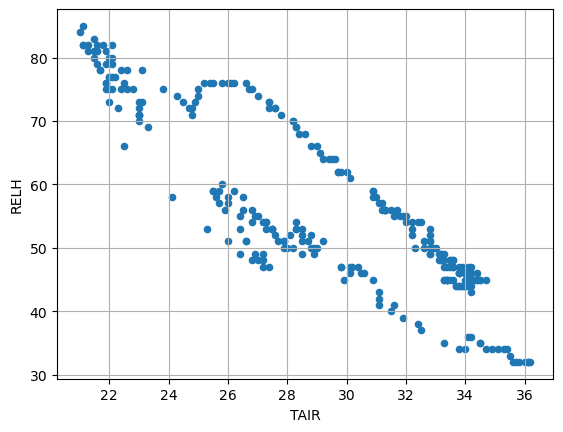

In [198]:
var1 = 'TAIR'
var2 = 'RELH'
data.plot(x=var1, y=var2, kind='scatter', grid=True)

Let's use the SciPy stats package to deteremine how correlated these two variables are.

In [199]:
r, p_value = stats.pearsonr(data[var1], data[var2])
print("R=", r)
print("P-value=",p_value)

R= -0.8707550621632547
P-value= 3.6606584776948053e-90


These two variables are inversely correlated.  This makes sense!  As temperature goes up, relative humidity goes down.  The scipy pearsonr function also gives us a P-value so we can assess the statistical significance of this relationship.

In [200]:
alpha = 0.05 # significance level
if p_value <= alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


The results indicate a p-value of 3.6e-90, which is **MUCH** less than $\alpha=0.05$, which means we reject the null hypothesis. 